#COMPLETE PROJECT PIPELINE
                                  #1. Data Cleaning
#Handle missing values

#Check duplicates

#Standardize categorical data

                           #2. Exploratory Data Analysis (EDA)
#Univariate & bivariate plots

#Correlation heatmaps

#Distribution of salary

                                 #3. Feature Engineering
#Encode categorical variables (OneHot or Label Encoding)

#Scale numeric features (optional for tree-based models)

                                    #4. Train-Test Split
#Split data into training and testing sets

                             #5. Model Training (with Ensembles)
#Train:

#Random Forest

#Gradient Boosting (e.g., XGBoost or HistGradientBoosting)

#Voting Regressor (ensemble of multiple models)

                                   #6. Evaluation
#Use R², MAE, RMSE

#Compare model performance

                                     #7. Final Prediction
#Predict salaries on test set

In [1]:
import pandas as pd 
import  numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# STEP 1: LOADING AND CLEANING THE DATA


In [3]:

df=pd.read_csv("Salary Data.csv") 




In [4]:
df # THE COMPLETE DATASET 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
  # BASIC DATASET INFO

In [7]:
df.shape#  GIVES THE TOTAL NO OF ROWS AND COLUMNS PRESENT IN THE DATASET 

(375, 6)

In [8]:
df.info() # GIVES THE CONCISE SUMMARY OF THE DATASET FOR ALL DATATYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [9]:
df.head()# GIVES THE TOP 5 ROWS OF THE DATASET 


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [12]:
df.sample()#   GIVES ANY ANONYMOUS  SINGLE  ROW OF THE DATASET 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
117,48.0,Male,PhD,Principal Engineer,20.0,170000.0


In [14]:
df.describe()#GIVES THE STATISTICAl STATISTICAL SUMMARY OF ONLY NUMERICAL COLUMN

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [16]:
df.dtypes# GIVES THE DATATYPES OF ALL COLUMNS

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [21]:
df.describe(include="all")# GIVES THE STATISTICAL SUMMARY FOR ALL DATATYPE COLUMNS IN THE DATASET 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373,373,373,373.000000,373.000000
unique,NaN,2,3,174,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,194,224,12,NaN,NaN
mean,37.431635,NaN,NaN,NaN,10.030831,100577.345845
std,7.069073,NaN,NaN,NaN,6.557007,48240.013482
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,31.000000,NaN,NaN,NaN,4.000000,55000.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


In [23]:
df.tail(5)# GIVES THE NUMBER OF ROWS FROM THE BOTTOM OF THE DATASET 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [ ]:
#  MISSING VALUE HANDLING 

In [24]:
df.isnull()# GIVES THE BOOLEAN VALUES AS TRUE/FALSE FOR ALL DATATYPES PRESENT  IN THE DATASET

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [26]:
df.isnull().sum()# GIVES THE TOTAL CUMMULATIVE FOR EACH COLUMN PRESENT IN THE DATASET FOR MISSING VALUES 

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [27]:
df["Age",].shape

(375,)

In [30]:
df["Years of Experience"].value_counts()

Years of Experience
2.0     31
3.0     30
8.0     25
9.0     22
4.0     20
7.0     18
10.0    18
16.0    18
5.0     17
15.0    16
19.0    15
12.0    15
20.0    13
18.0    13
21.0    13
14.0    13
1.5     12
6.0     12
13.0    11
11.0    10
22.0     9
1.0      7
17.0     5
25.0     3
0.0      3
23.0     2
24.0     1
0.5      1
Name: count, dtype: int64

In [ ]:
# DUPLICATE HANDLING

In [31]:
df.duplicated()# 

0      False
1      False
2      False
3      False
4      False
       ...  
370     True
371    False
372     True
373     True
374     True
Length: 375, dtype: bool

In [33]:
df.duplicated().sum()# GIVES THE TOTAL NUMBE ROF DUPLICATE NO OF ROES 

50

In [35]:
df[df.duplicated()]# GIVES THE ACTUAL DUPLICATE ROWS EXCLUDING THE FIRST INSTANCE 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [42]:
df=df.dropna()# REMOVES THE MISSING ROWS FROM 375 TOTAL ROWS

In [43]:
df.shape# NO OF ROWS OF COLUMNS AFTER REMOVING THE MISSING ROWS

(373, 6)

In [44]:
df=df.drop_duplicates()# DROPPING THE DUPLICATE VALUES 

In [46]:
df.shape#  ROWS AND CLOUNS AFTER DROPPING 

(324, 6)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [48]:
df["Gender"].unique()# FINDING UNIQUE CATEGORY IN GENDER FEATURE 

array(['Male', 'Female'], dtype=object)

In [49]:
df["Education Level"].unique()# FINDING UNIQUE CATEGORY IN EDUCATION LEVEL FEATURE 

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [50]:
df["Job Title"].unique()# FINDING UNIQUE CATEGORY IN JOB TITLE FEATURE 

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [51]:
from sklearn.preprocessing import StandardScaler#  STANDARDIZATION OF NUMERICAL CLOUMNS ONLY = BRINGING ALL DATA POINTS TO SAME SCALE 
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])


In [52]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.750231,Male,Bachelor's,Software Engineer,-0.761821,-0.205563
1,-1.307742,Female,Master's,Data Analyst,-1.063017,-0.720208
2,1.061680,Male,PhD,Senior Manager,0.744158,1.029586
3,-0.192720,Female,Bachelor's,Sales Associate,-0.460625,-0.823137
4,2.037324,Male,Master's,Director,1.497148,2.058877
...,...,...,...,...,...,...
348,-1.307742,Female,Bachelor's,Junior Operations Manager,-1.364212,-1.337783
349,-0.192720,Male,Bachelor's,Senior Business Development Manager,-0.310027,0.206154
350,0.922302,Female,PhD,Senior Data Scientist,0.894756,1.235445
351,-0.889609,Male,Bachelor's,Junior Marketing Coordinator,-1.063017,-0.926066


In [53]:
num_cols1=["Age","Years of Experience","Salary"]
# REMOVING OUTLIERS FROM THE STANDARDIZED NUMERICAL COLUMNS IN THE DATASET 
for col in num_cols1:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[col] >=lower_bound)& (df[col]<=upper_bound)]


# STEP 2: EDA

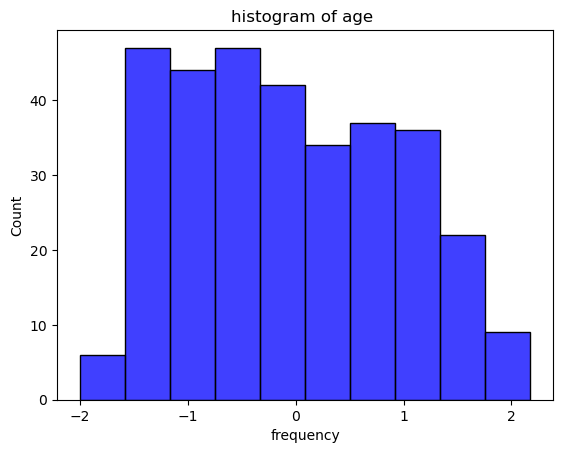

In [54]:
# UNIVARIATE ANALYSIS 

# histogram frequency distribution ofa numerical column Age 
sns.histplot(df["Age"], bins=10,kde=False,color="blue")
plt.title("histogram of age ")
plt.xlabel("frequency")
plt.show()




C:\Users\SHUBHANGI SRIVASTAVA\AppData\Local\Temp\ipykernel_25288\1283379125.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Salary"],shade=True,color="yellow")


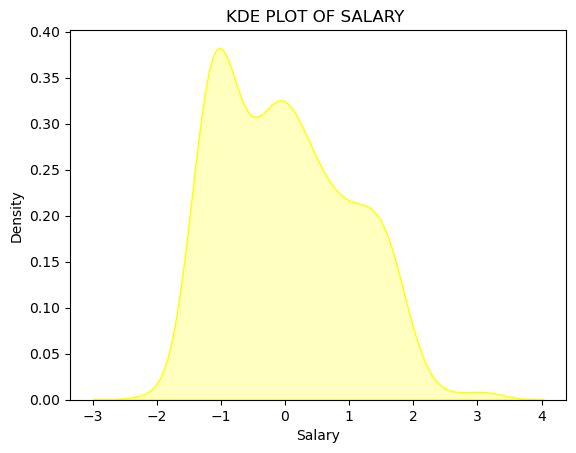

In [55]:
#   KDE PLOT (SMOOTHED CURVE )=GIVES A SMOOTH ESTIMATE OF THE DISTRIBUTION (GOOD FOR SEEING SHAPE )

sns.kdeplot(df["Salary"],shade=True,color="yellow")
plt.title("KDE PLOT OF SALARY ")
plt.xlabel("Salary")
plt.show()

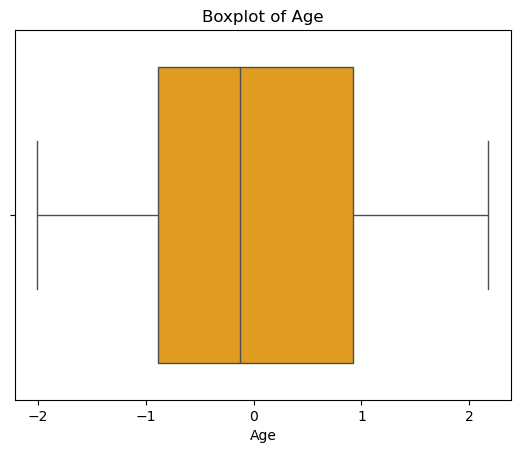

In [56]:
# BOXPLOT=HIGHLIGHTS THE SPREAD, MEDIAN AND OUTLIERS

sns.boxplot(x=df['Age'], color='orange')
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

In [57]:
#Summary Statistics= Shows central tendency & spread
print("Summary stats for Age:")
print(df['Age'].describe())

print("\nMean:", df['Age'].mean())
print("Median:", df['Age'].median())
print("Standard Deviation:", df['Age'].std())
print("Skewness:", df['Age'].skew())
print("Kurtosis:", df['Age'].kurt())

Summary stats for Age:
count    3.240000e+02
mean     1.398059e-16
std      1.001547e+00
min     -2.004631e+00
25%     -8.896086e-01
50%     -1.230310e-01
75%      9.223021e-01
max      2.176702e+00
Name: Age, dtype: float64

Mean: 1.398058623602049e-16
Median: -0.1230309764380074
Standard Deviation: 1.0015467913343836
Skewness: 0.19520171937495892
Kurtosis: -1.021964270365721


C:\Users\SHUBHANGI SRIVASTAVA\AppData\Local\Temp\ipykernel_25288\1857992260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender",data=df,palette="Set2")


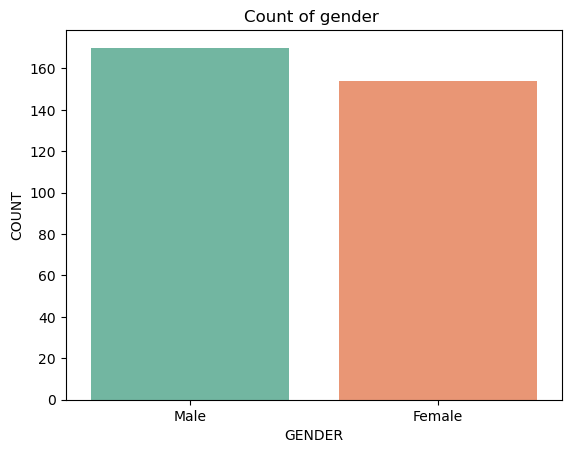

In [58]:
# BARPLOT/COUNTPLOT=SHOWS COUNT OF EACH CATEGORY 


sns.countplot(x="Gender",data=df,palette="Set2")
plt.title("Count of gender ")
plt.xlabel("GENDER")
plt.ylabel("COUNT")
plt.show()

In [59]:
# FREQUENCY DISTRIBUTION= PRINTS THE NUMBER AND PERCENTAGE OF EACH CATEGORY 

print("FREQUENCY DISTRIBUTION FOR GENDER: ")
print(df["Gender"].value_counts())

print("\n PRECENTAGE DISTRIBUTION:")
print(df["Gender"].value_counts(normalize=True)*100)

FREQUENCY DISTRIBUTION FOR GENDER: 
Gender
Male      170
Female    154
Name: count, dtype: int64

 PRECENTAGE DISTRIBUTION:
Gender
Male      52.469136
Female    47.530864
Name: proportion, dtype: float64


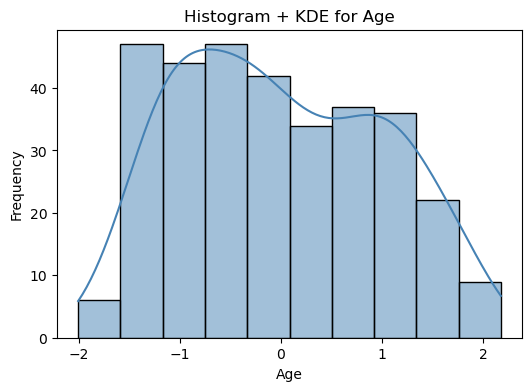

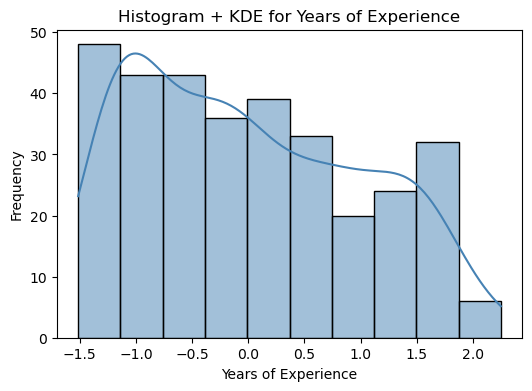

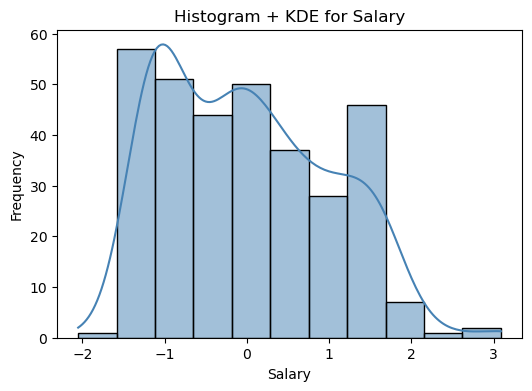

In [60]:
# LOOP THROUGH ALL COLUMNS AUTOMATICALLY 

# NUMERICAL COLUMN
num_cols=df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f"Histogram + KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\SHUBHANGI SRIVASTAVA\AppData\Local\Temp\ipykernel_25288\4104106877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


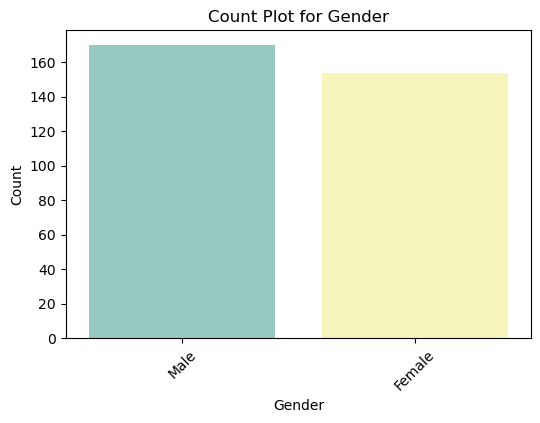

C:\Users\SHUBHANGI SRIVASTAVA\AppData\Local\Temp\ipykernel_25288\4104106877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


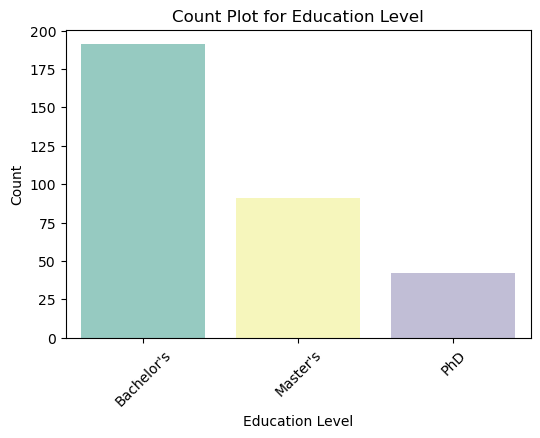

C:\Users\SHUBHANGI SRIVASTAVA\AppData\Local\Temp\ipykernel_25288\4104106877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


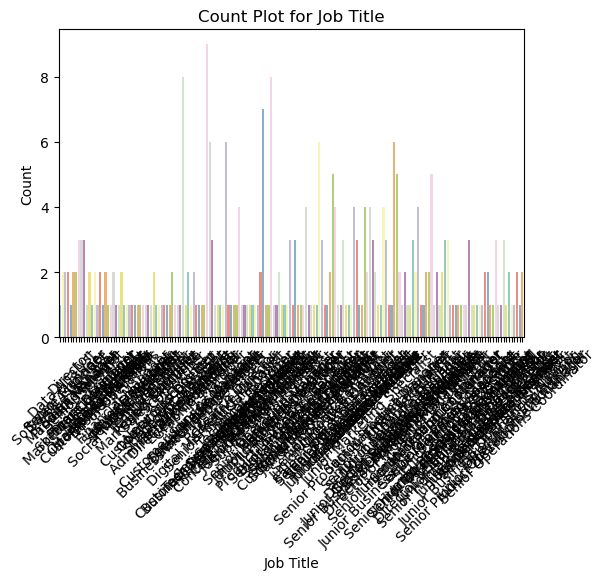

In [61]:
# CATEGORICAL COLUMNS 

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set3')
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [62]:
# BIVARIATE ANALYSIS

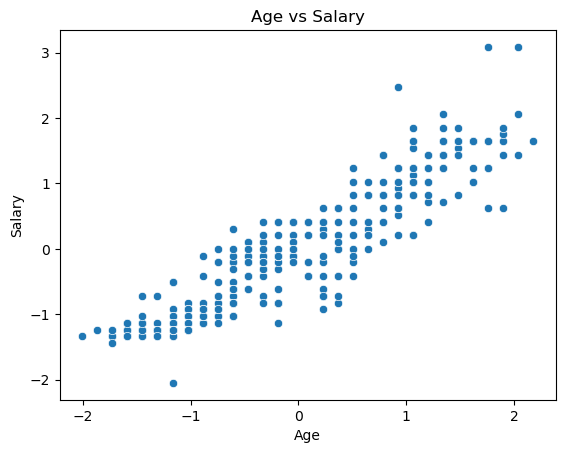

In [63]:
# SCATTER PLOT 
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

Correlation Matrix:
                           Age  Years of Experience    Salary
Age                  1.000000             0.979192  0.916543
Years of Experience  0.979192             1.000000  0.924455
Salary               0.916543             0.924455  1.000000


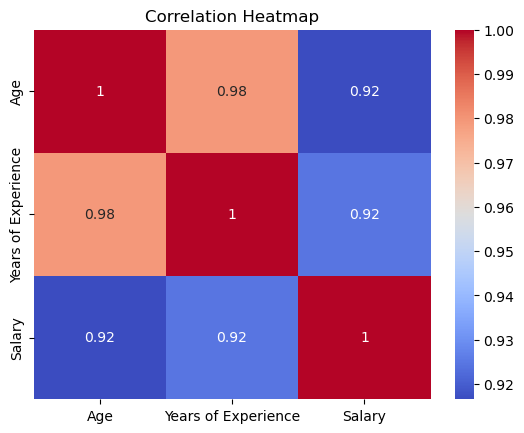

In [64]:
# CORRELATION COEFFICIENT 

corr = df.corr(numeric_only=True)
print("Correlation Matrix:\n", corr)


sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# CATEGORICAL VS NUMERICAL 

# BOX PLOT 

C:\Users\SHUBHANGI SRIVASTAVA\AppData\Local\Temp\ipykernel_25288\3606783844.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette="Set2")


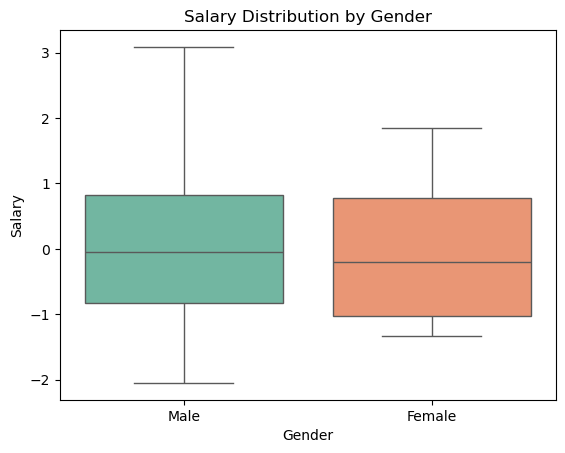

In [65]:
sns.boxplot(x='Gender', y='Salary', data=df, palette="Set2")
plt.title("Salary Distribution by Gender")
plt.show()

C:\Users\SHUBHANGI SRIVASTAVA\AppData\Local\Temp\ipykernel_25288\1411689886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df, palette="pastel")


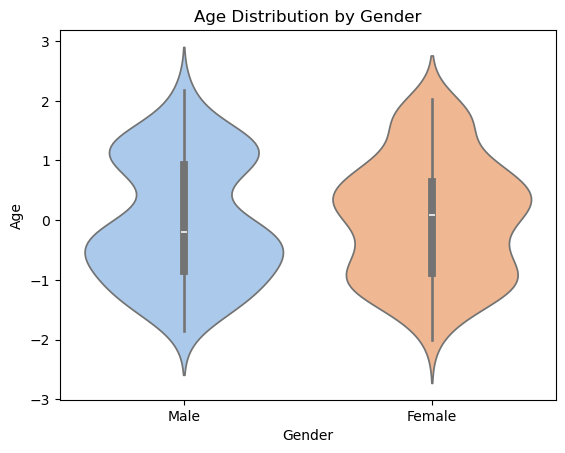

In [67]:
# VOILIN PLOT 

sns.violinplot(x='Gender', y='Age', data=df, palette="pastel")
plt.title("Age Distribution by Gender")
plt.show()

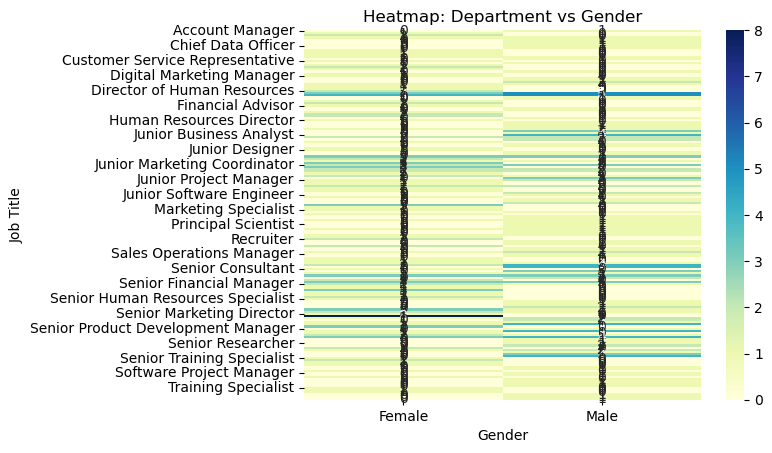

In [70]:
cross_tab = pd.crosstab(df['Job Title'], df['Gender'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Department vs Gender")
plt.show()

In [71]:
# CORRELATION ANALYSIS

corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                          Age  Years of Experience    Salary
Age                  1.000000             0.979192  0.916543
Years of Experience  0.979192             1.000000  0.924455
Salary               0.916543             0.924455  1.000000


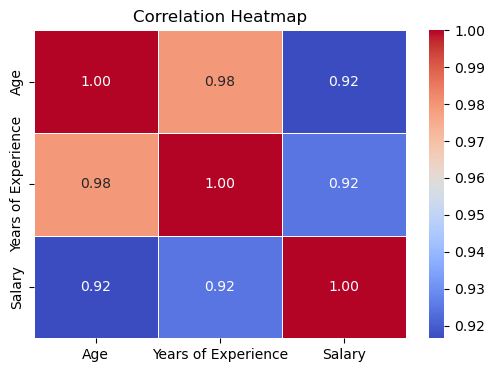

In [72]:
# HEATMAP 

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Highly Correlated Feature Pairs:
Age ↔ Years of Experience → Correlation: 0.98
Age ↔ Salary → Correlation: 0.92
Years of Experience ↔ Age → Correlation: 0.98
Years of Experience ↔ Salary → Correlation: 0.92
Salary ↔ Age → Correlation: 0.92
Salary ↔ Years of Experience → Correlation: 0.92


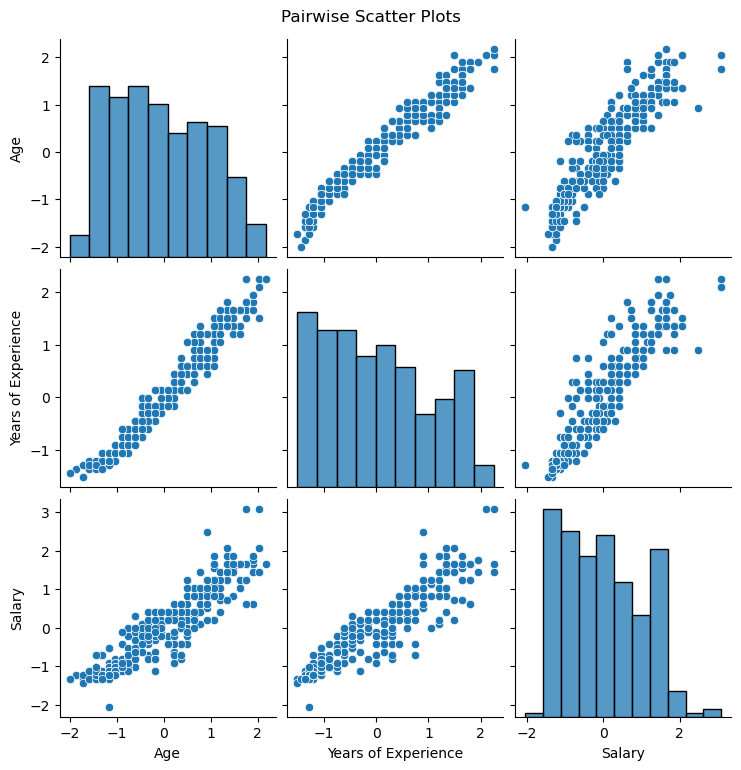

In [74]:
#Identify Highly Correlated Features (Multicollinearity)
threshold = 0.8


mask = (corr_matrix >= threshold) & (corr_matrix < 1.0)


print("Highly Correlated Feature Pairs:")
for col in mask.columns:
    high_corr = mask[col][mask[col]].index.tolist()
    for other in high_corr:
        print(f"{col} ↔ {other} → Correlation: {corr_matrix.loc[col, other]:.2f}")


sns.pairplot(df)
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()


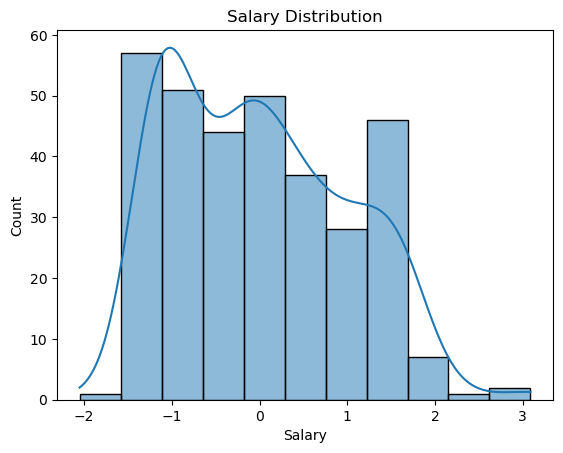

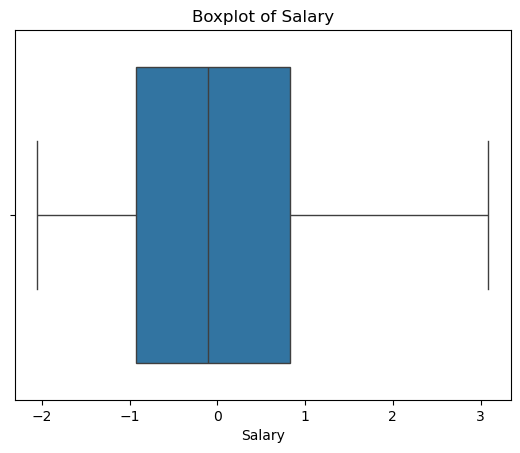

In [75]:
# FEATURE DISTRIBUTION 

# DISTRIBUTION PLOTS 
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()


sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')
plt.show()


In [76]:
# SKEWNESS & TRANSFORMATION 


df['Salary'].skew()


0.43705707638029667

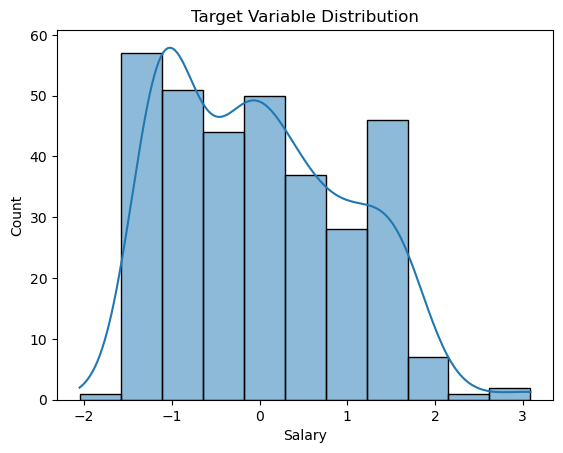

0.43705707638029667

In [78]:
# TRAGET VARIABLE DISTRIBUTION 
sns.histplot(df['Salary'], kde=True)
plt.title('Target Variable Distribution')
plt.show()


df['Salary'].skew()


# STEP 3: FEATURE ENGINEERING 

In [81]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoded
0,-0.750231,Male,Bachelor's,Software Engineer,-0.761821,-0.205563,1
1,-1.307742,Female,Master's,Data Analyst,-1.063017,-0.720208,0
2,1.061680,Male,PhD,Senior Manager,0.744158,1.029586,1
3,-0.192720,Female,Bachelor's,Sales Associate,-0.460625,-0.823137,0
4,2.037324,Male,Master's,Director,1.497148,2.058877,1
...,...,...,...,...,...,...,...
348,-1.307742,Female,Bachelor's,Junior Operations Manager,-1.364212,-1.337783,0
349,-0.192720,Male,Bachelor's,Senior Business Development Manager,-0.310027,0.206154,1
350,0.922302,Female,PhD,Senior Data Scientist,0.894756,1.235445,0
351,-0.889609,Male,Bachelor's,Junior Marketing Coordinator,-1.063017,-0.926066,1


In [82]:
# LABEL ENCODING 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols=["Gender","Education Level","Job Title"]
for col in cat_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])

In [83]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoded,Education Level_encoded,Job Title_encoded
0,-0.750231,Male,Bachelor's,Software Engineer,-0.761821,-0.205563,1,0,159
1,-1.307742,Female,Master's,Data Analyst,-1.063017,-0.720208,0,1,17
2,1.061680,Male,PhD,Senior Manager,0.744158,1.029586,1,2,130
3,-0.192720,Female,Bachelor's,Sales Associate,-0.460625,-0.823137,0,0,101
4,2.037324,Male,Master's,Director,1.497148,2.058877,1,1,22
...,...,...,...,...,...,...,...,...,...
348,-1.307742,Female,Bachelor's,Junior Operations Manager,-1.364212,-1.337783,0,0,68
349,-0.192720,Male,Bachelor's,Senior Business Development Manager,-0.310027,0.206154,1,0,111
350,0.922302,Female,PhD,Senior Data Scientist,0.894756,1.235445,0,2,115
351,-0.889609,Male,Bachelor's,Junior Marketing Coordinator,-1.063017,-0.926066,1,0,63


# STEP 4:  TRAIN TEST SPLIT 

In [85]:
X = df[['Age', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded', 'Years of Experience']]
y = df['Salary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)


#  STEP 5:MODEL TRAINING (WITH ENSEMBLES )

In [86]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor  # optional if you prefer XGBoost
from sklearn.metrics import mean_squared_error, r2_score


In [87]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("🔸 Random Forest:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


🔸 Random Forest:
R² Score: 0.9216762956504758
RMSE: 0.2920312263632061


C:\Users\SHUBHANGI SRIVASTAVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

print("🔸 Gradient Boosting (sklearn):")
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))


🔸 Gradient Boosting (sklearn):
R² Score: 0.9408297112196068
RMSE: 0.25382507721371284


C:\Users\SHUBHANGI SRIVASTAVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [90]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)
voting_reg = VotingRegressor(estimators=[
    ('rf', rf),
    ('gbr', gbr),
    ('xgb', xgb)
])


#  STEP 6: EVALUATION 


In [110]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# 1. Define models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

# 2. Fit models
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# 3. Predict
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

# 4. Evaluate function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # root mean squared error
    print(f"{name}")
    print(f"R² Score  : {r2:.4f}")
    print(f"MAE       : {mae:.4f}")
    print(f"RMSE      : {rmse:.4f}")
    print("-" * 30)
    return {'Model': name, 'R2': r2, 'MAE': mae, 'RMSE': rmse}

# 5. Store results
results = []
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results.append(evaluate_model("Gradient Boosting", y_test, y_pred_gbr))

# 6. Voting Regressor (Ensemble)
voting_reg = VotingRegressor(estimators=[
    ('rf', rf),
    ('gbr', gbr)
])

voting_reg.fit(X_train, y_train)
y_pred_voting = voting_reg.predict(X_test)
results.append(evaluate_model("Voting Regressor", y_test, y_pred_voting))

# 7. Compare all model results
results_df = pd.DataFrame(results)
print("\n🔍 Model Performance Comparison:")
print(results_df.sort_values(by='R2', ascending=False))


Random Forest
R² Score  : 0.9217
MAE       : 0.1999
RMSE      : 0.2920
------------------------------
Gradient Boosting
R² Score  : 0.9408
MAE       : 0.1863
RMSE      : 0.2538
------------------------------
Voting Regressor
R² Score  : 0.9356
MAE       : 0.1881
RMSE      : 0.2648
------------------------------

🔍 Model Performance Comparison:
               Model        R2       MAE      RMSE
1  Gradient Boosting  0.940830  0.186308  0.253825
2   Voting Regressor  0.935592  0.188079  0.264821
0      Random Forest  0.921676  0.199851  0.292031


C:\Users\SHUBHANGI SRIVASTAVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SHUBHANGI SRIVASTAVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SHUBHANGI SRIVASTAVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


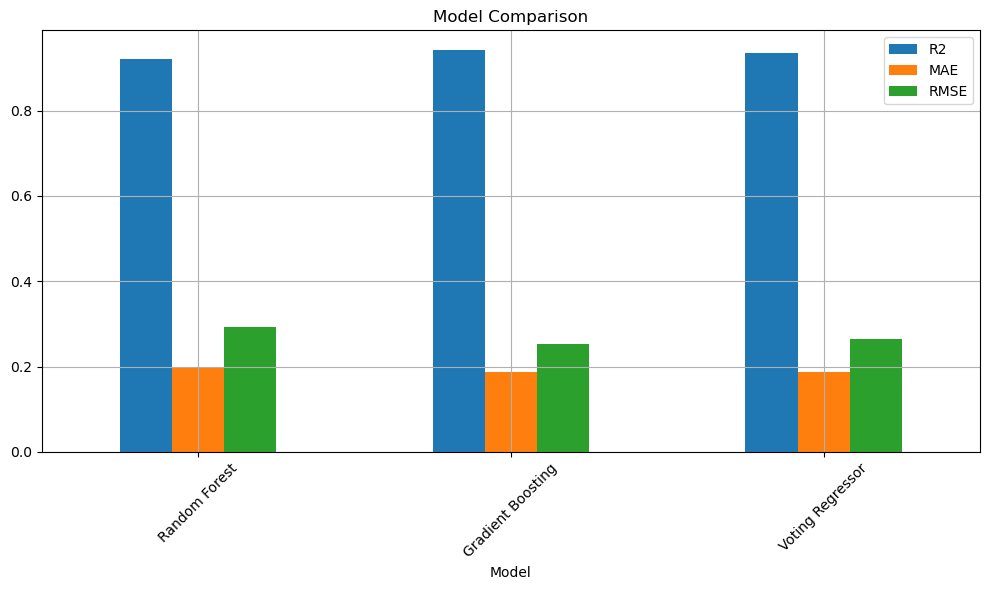

In [111]:
import matplotlib.pyplot as plt

results_df.plot(kind='bar', x='Model', y=['R2', 'MAE', 'RMSE'], figsize=(10, 6), title="Model Comparison")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# FINAL PREDICTION 

In [112]:
# Final Prediction using Voting Regressor
final_predictions = voting_reg.predict(X_test)

# Convert to DataFrame for viewing/saving
final_output = pd.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': final_predictions
})

# Display the top rows
print(final_output.head())


     Actual Salary  Predicted Salary
136       0.823728          0.932907
266      -0.102634         -0.157122
105       2.470594          1.673500
204      -0.205563         -0.239581
100      -1.131925         -1.017229


In [114]:
# Save the predictions to a CSV file
final_output.to_csv("final_salary_predictions_IBM.csv", index=False)
print(" Final predictions saved as 'final_salary_predictions.csv'")


 Final predictions saved as 'final_salary_predictions.csv'
